In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.max_columns = 50

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [7]:
train_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


In [8]:
test_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,110023.000000,220045.000000,31761.048671,165034.000000,192539.500000,220045.000000,247550.500000,275056.000000
CustomerId,110023.000000,15692096.605101,71684.990992,15565701.000000,15632859.000000,15690175.000000,15756926.000000,15815690.000000
CreditScore,110023.000000,656.530789,80.315415,350.000000,597.000000,660.000000,710.000000,850.000000
Age,110023.000000,38.122205,8.861550,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,110023.000000,4.996637,2.806148,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,110023.000000,55333.611354,62788.519675,0.000000,0.000000,0.000000,120145.605000,250898.090000
NumOfProducts,110023.000000,1.553321,0.544714,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,110023.000000,0.753043,0.431244,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,110023.000000,0.495233,0.499980,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,110023.000000,112315.147765,50277.048244,11.580000,74440.325000,117832.230000,154631.350000,199992.480000


# Data Cleaning 

## Missing Data

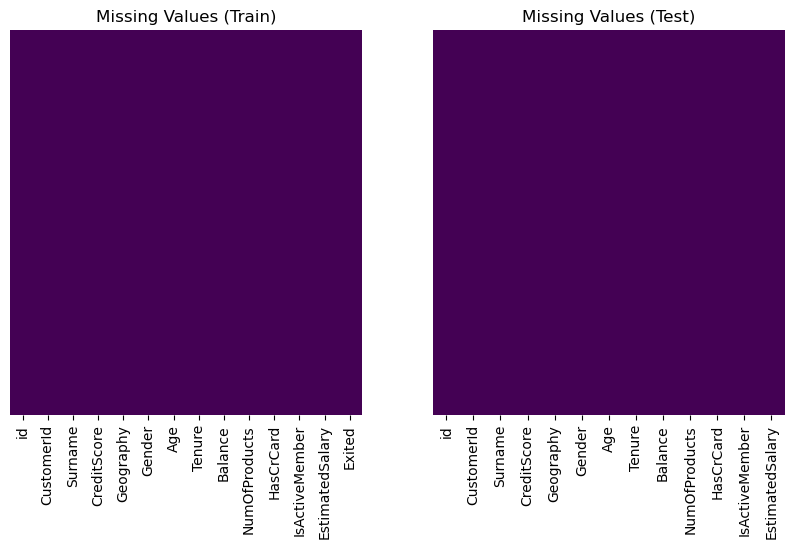

In [9]:
train_nulls = train_df.isnull()

test_nulls = test_df.isnull()


plt.subplots(1,2,figsize=(10,5))

# subplot for missing values in train set
plt.subplot(1,2,1)
sns.heatmap(train_nulls, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values (Train)')

# subplot for missing values in test set
plt.subplot(1,2,2)
sns.heatmap(test_nulls, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values (Test)')

plt.show()

There are no null values in both datasets.

## Duplicates

In [10]:
print(f"There are {train_df.duplicated().sum()} duplicates in the train set.")
print(f"There are {test_df.duplicated().sum()} duplicates in the test set.")

There are 0 duplicates in the train set.
There are 0 duplicates in the test set.


## Drop Redundant Column

Looks like the `id`, `CustomerId`, and `Surname` columns serve the same function as identifiers, we should check if they are redundant.

In [11]:
print(f"There are {train_df['id'].duplicated().sum()} duplicated ids in the train set.")
print(f"There are {test_df['id'].duplicated().sum()} duplicated ids in the test set.")
print('\n')
print(f"There are {train_df['CustomerId'].duplicated().sum()} duplicated CustomerIds in the train set.")
print(f"There are {test_df['CustomerId'].duplicated().sum()} duplicated CustomerIds in the test set.")
print('\n')
print(f"There are {train_df['Surname'].duplicated().sum()} duplicated Surnames in the train set.")
print(f"There are {test_df['Surname'].duplicated().sum()} duplicated Surnames in the test set.")

There are 0 duplicated ids in the train set.
There are 0 duplicated ids in the test set.


There are 141813 duplicated CustomerIds in the train set.
There are 90325 duplicated CustomerIds in the test set.


There are 162237 duplicated Surnames in the train set.
There are 107315 duplicated Surnames in the test set.


In [12]:
# get users with duplicated surnames and customer id
train_df[train_df['CustomerId'].duplicated()&train_df['Surname'].duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
124,124,15741417,Ts'ui,706,France,Female,42.0,8,0.0,2,1.0,0.0,167778.61,0
160,160,15763612,Y?an,712,France,Female,43.0,4,0.0,2,0.0,0.0,117038.96,0
166,166,15720353,T'ien,539,France,Female,30.0,1,0.0,2,1.0,0.0,152577.28,0
277,277,15585892,Mazzi,679,Spain,Female,35.0,8,0.0,1,0.0,0.0,164453.98,1
444,444,15691808,Pinto,687,Spain,Male,27.0,8,0.0,2,1.0,0.0,74850.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0


In [13]:
# check users with customer id 15741417
train_df[train_df['CustomerId']==15741417]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
124,124,15741417,Ts'ui,706,France,Female,42.0,8,0.00,2,1.0,0.0,167778.61,0
6910,6910,15741417,Rossi,624,France,Male,34.0,3,0.00,2,0.0,0.0,163667.56,0
8881,8881,15741417,Genovese,548,France,Male,33.0,7,132418.52,1,1.0,1.0,168032.49,0
15208,15208,15741417,Hsia,718,France,Male,43.0,8,0.00,2,0.0,1.0,58883.90,0
15428,15428,15741417,Yegorova,631,Germany,Male,39.0,7,129205.49,2,1.0,0.0,56214.09,1
22444,22444,15741417,Tung,683,France,Male,34.0,5,0.00,2,1.0,1.0,115916.15,0
25292,25292,15741417,Chibuzo,619,Germany,Female,35.0,6,119656.45,2,1.0,1.0,4595.05,0
26785,26785,15741417,Okeke,648,France,Female,38.0,1,0.00,2,1.0,1.0,66799.27,0
33869,33869,15741417,P'eng,666,France,Male,38.0,6,0.00,2,0.0,1.0,46422.46,0


Numerous users are associated with identical `CustomerId`. Given their diverse geographical locations and age differences, shared account usage seems implausible, suggesting a potential data error. Conversely, `id` serves as a unique identifier for individual records but lacks predictive relevance for our models and should be excluded. The `Surname` column will be retained, as it could potentially provide insights into cultural, ethnic, or geographical contexts.

In [14]:
# drop `id` and `CustomerId`
train_df = train_df.drop(columns=['id','CustomerId'])
test_df = test_df.drop(columns=['id','CustomerId'])

After removing the redundant columns, we need to check for duplicates again.

In [15]:
print(f"There are {train_df.duplicated().sum()} duplicates in the train set.")
print(f"There are {test_df.duplicated().sum()} duplicates in the test set.")

There are 54 duplicates in the train set.
There are 36 duplicates in the test set.


In [16]:
# drop duplicated rows
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# reset index
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# EDA

## Univariate Analysis

### Target Variable Analysis

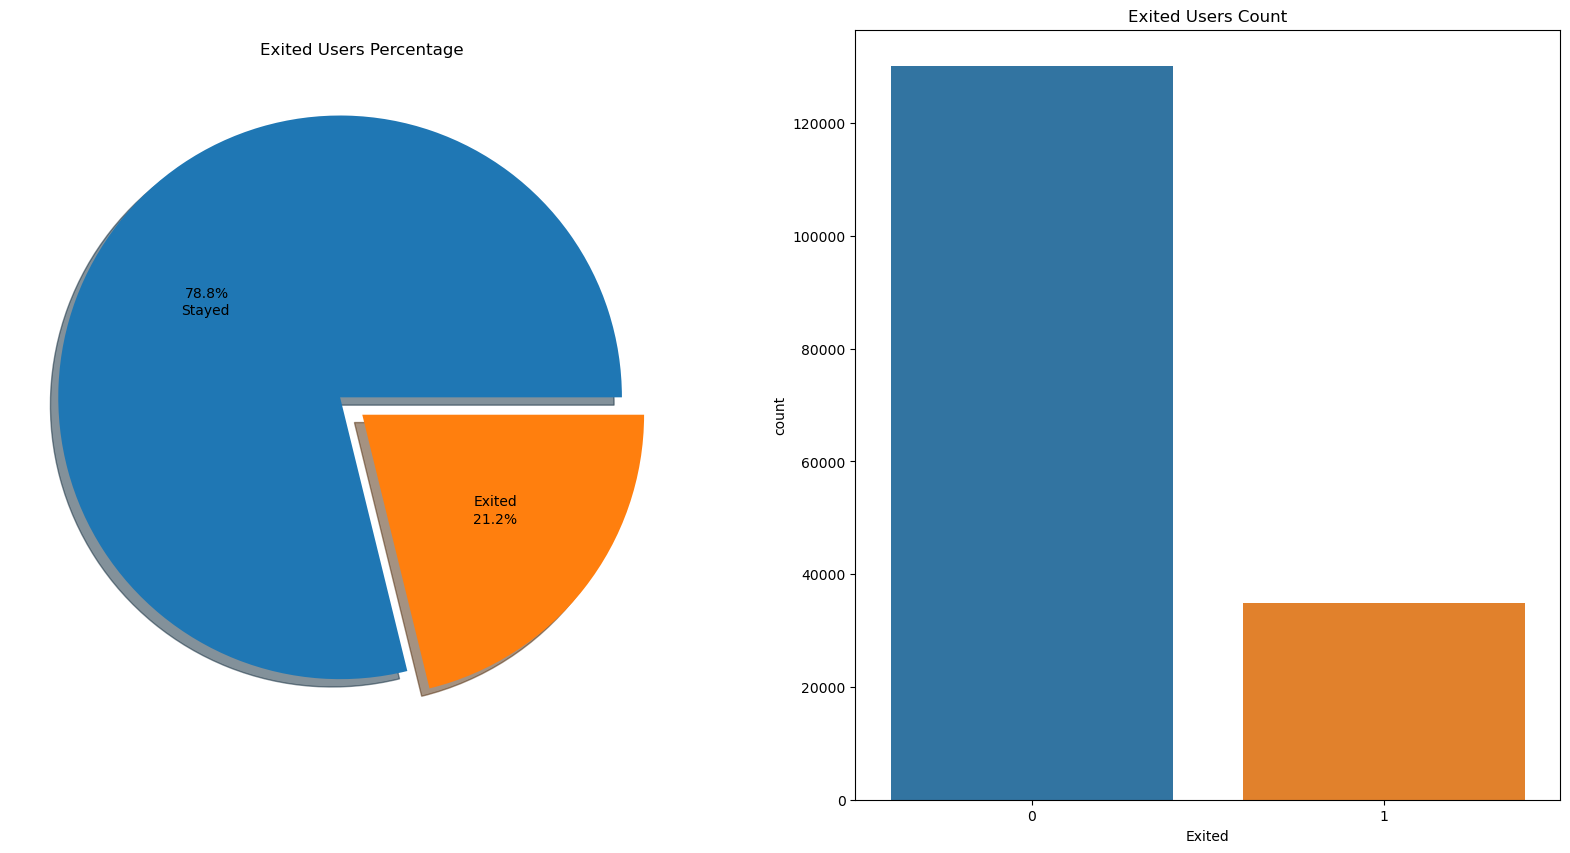

In [17]:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.pie(train_df['Exited'].value_counts(),
       autopct='%1.1f%%',
       shadow=True,
       labels=['Stayed','Exited'],
       labeldistance=0.5,
       explode=[0.1,0])
    
plt.title(f"Exited Users Percentage")


plt.subplot(1,2,2)
sns.countplot(x=train_df['Exited'])
    
plt.title(f"Exited Users Count")
plt.show()

There is significant class imbalance in the dataset, that can skew our models and cause the model to overfit on the majority class. I will apply resampling method in the modelling process.

In [18]:
train_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Categorical Features

In [19]:
# list of categorical features
train_df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

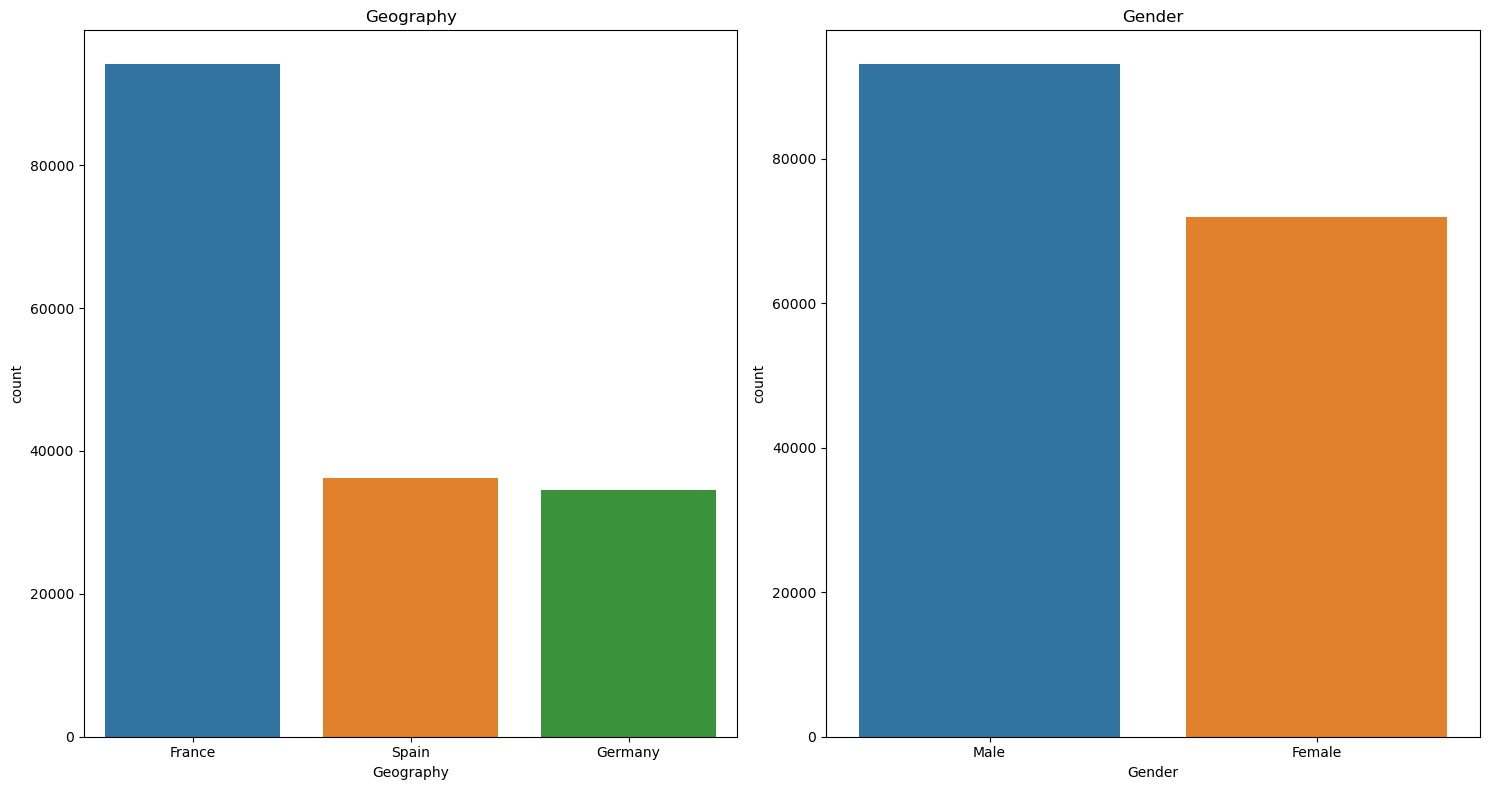

In [20]:
cat_features = ['Geography', 'Gender']

plt.subplots(1,2,figsize=(15,8))

for i, col in enumerate(cat_features):
    plt.subplot(1,2,i+1)
    sns.countplot(x=train_df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [21]:
round(train_df['Geography'].value_counts()/len(train_df),2)

France     0.57
Spain      0.22
Germany    0.21
Name: Geography, dtype: float64

In [22]:
round(train_df['Gender'].value_counts()/len(train_df),2)

Male      0.56
Female    0.44
Name: Gender, dtype: float64

- More than half of the users are from France, Spain and Germany are similar in terms of number of users.
- Male users are about 12% more than female users.

### Numerical Features

In [23]:
# list of numerical features
train_df.select_dtypes(include='number').columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

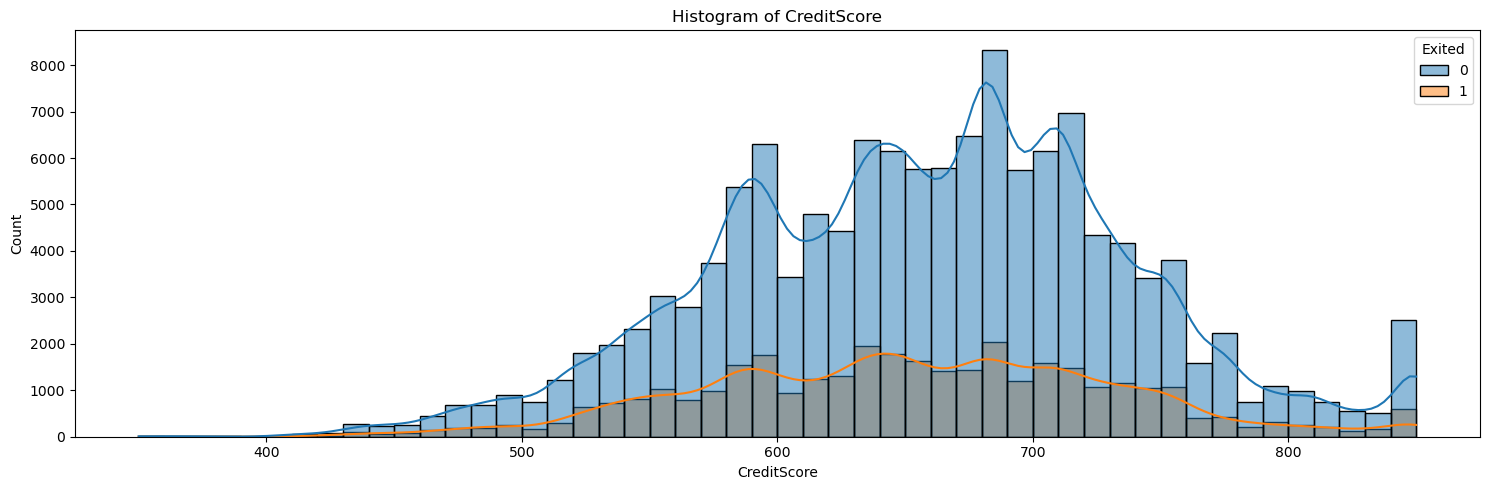

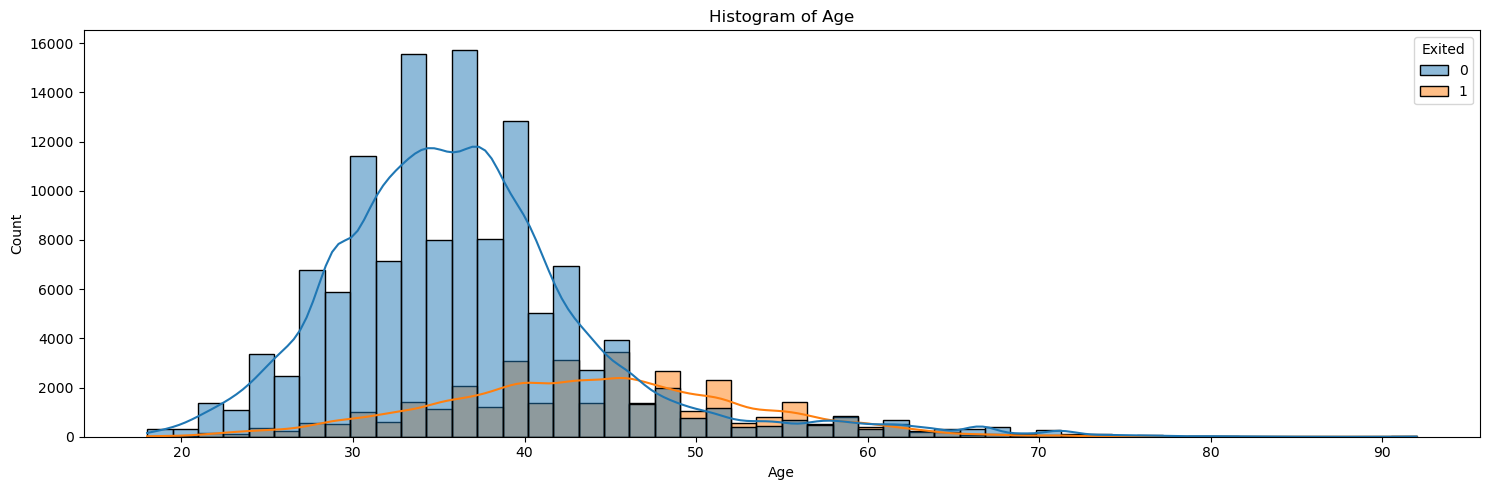

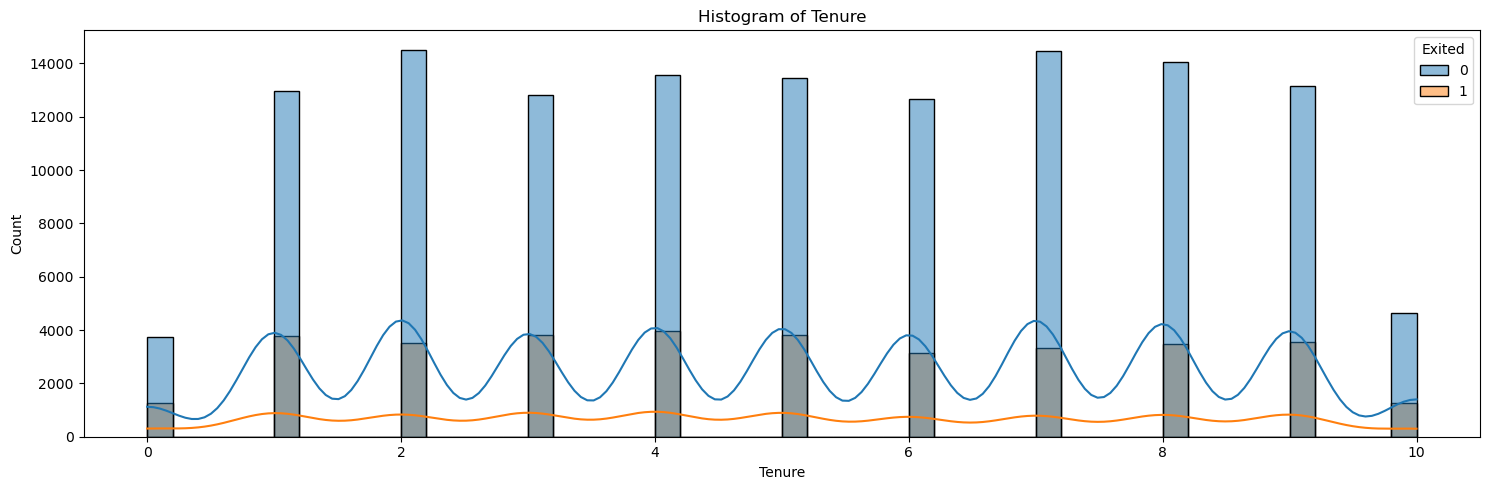

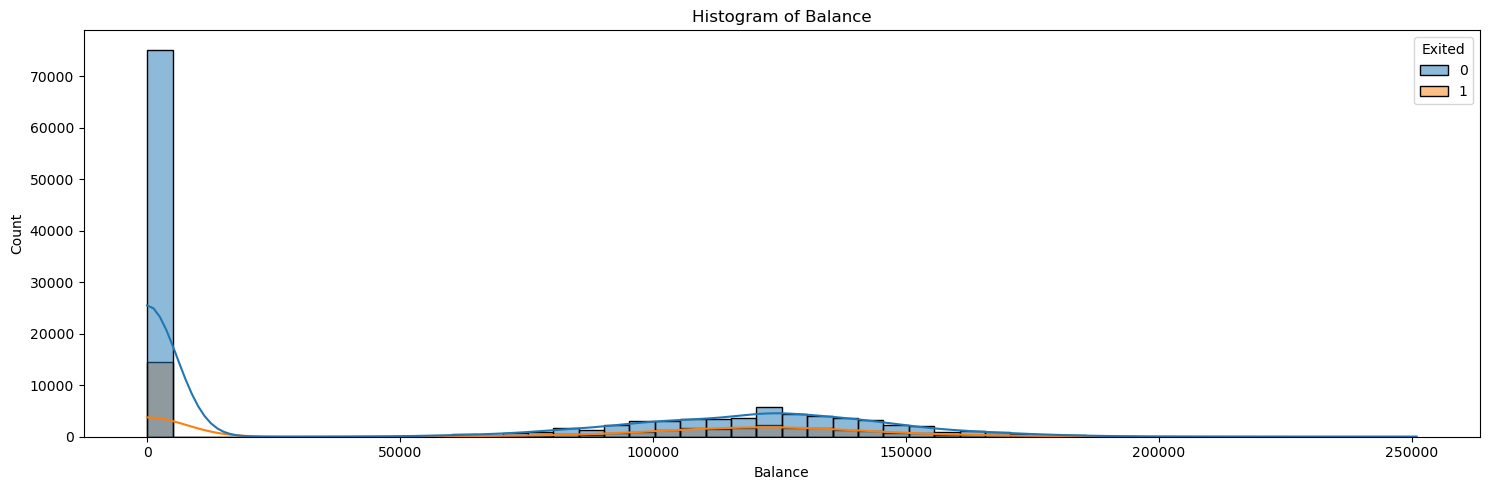

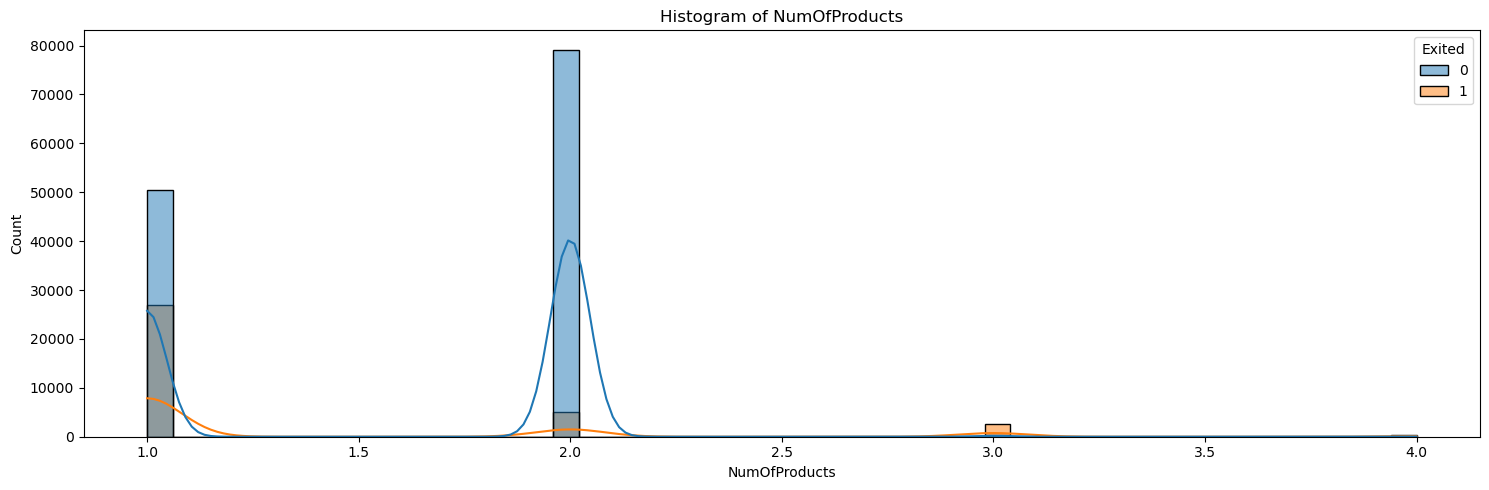

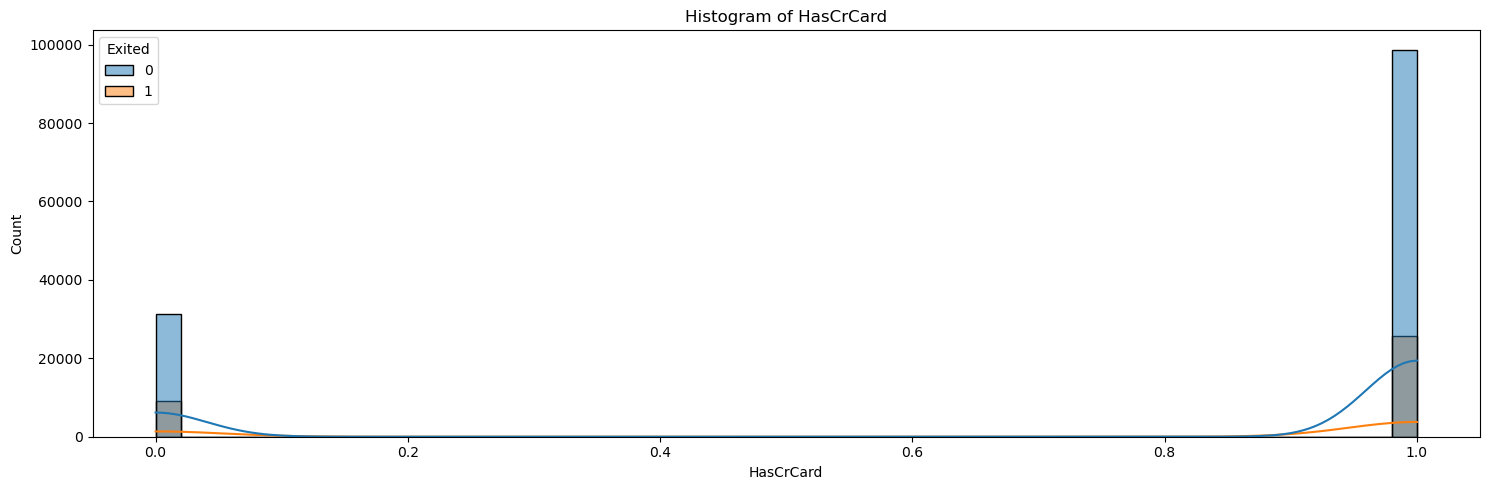

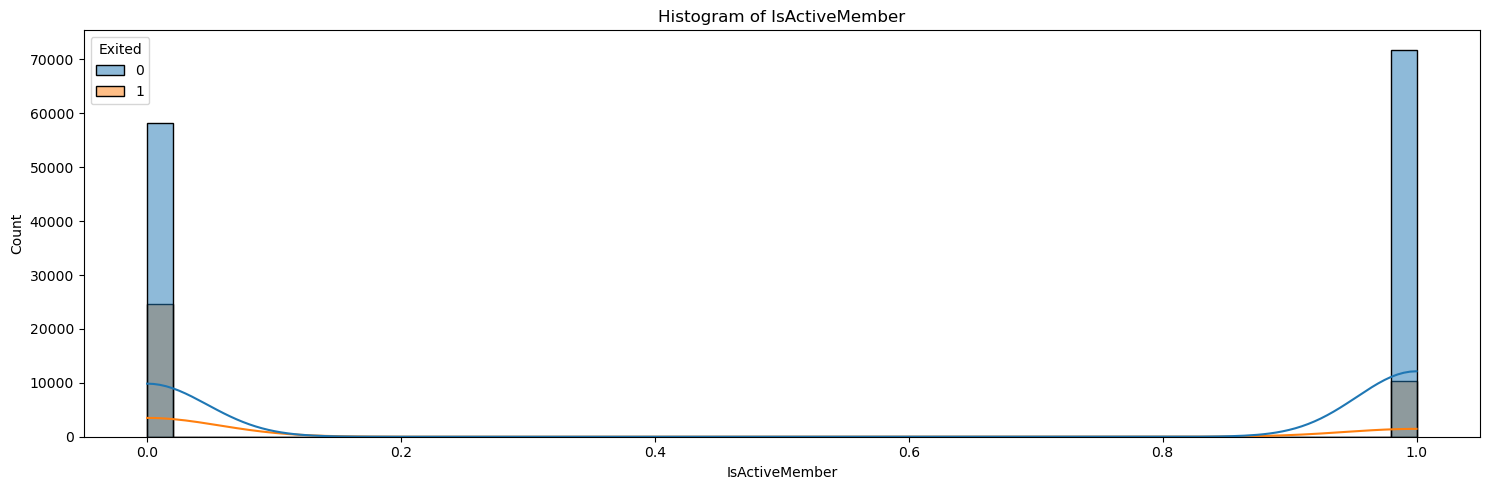

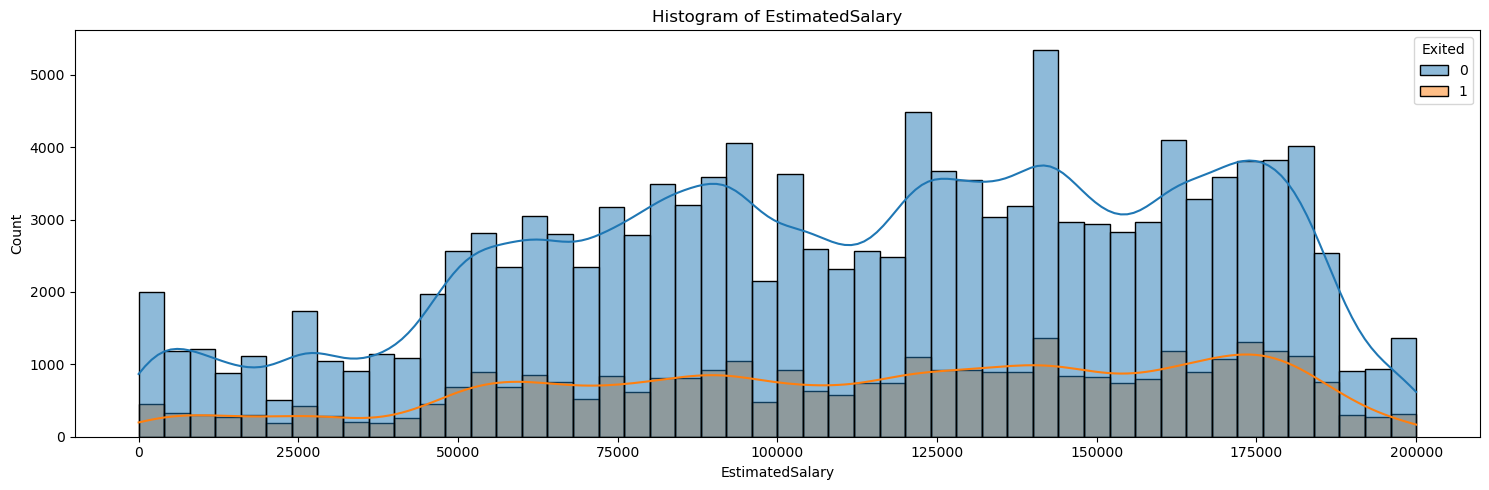

In [24]:
# drop `Exited`
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

# visualize distributions of numerical features
for col in num_features:
    
    plt.figure(figsize=(15,5))
    sns.histplot(data=train_df,
                x=col,
                hue='Exited',
                bins=50,
                kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

- For `CreditScore`, `Tenure`, `Balance`, `HasCrCard`, and `EstimatedSalary`, two groups exhibit similar distribution.
- Users ranging in age from late 40s to mid 60s are more likely to churn.
- Individuals that own 1 and 3 or more products have higher propensitiy to churn than those own 2 products.
- Active users are less likely to churn.

## Multivariate Analysis

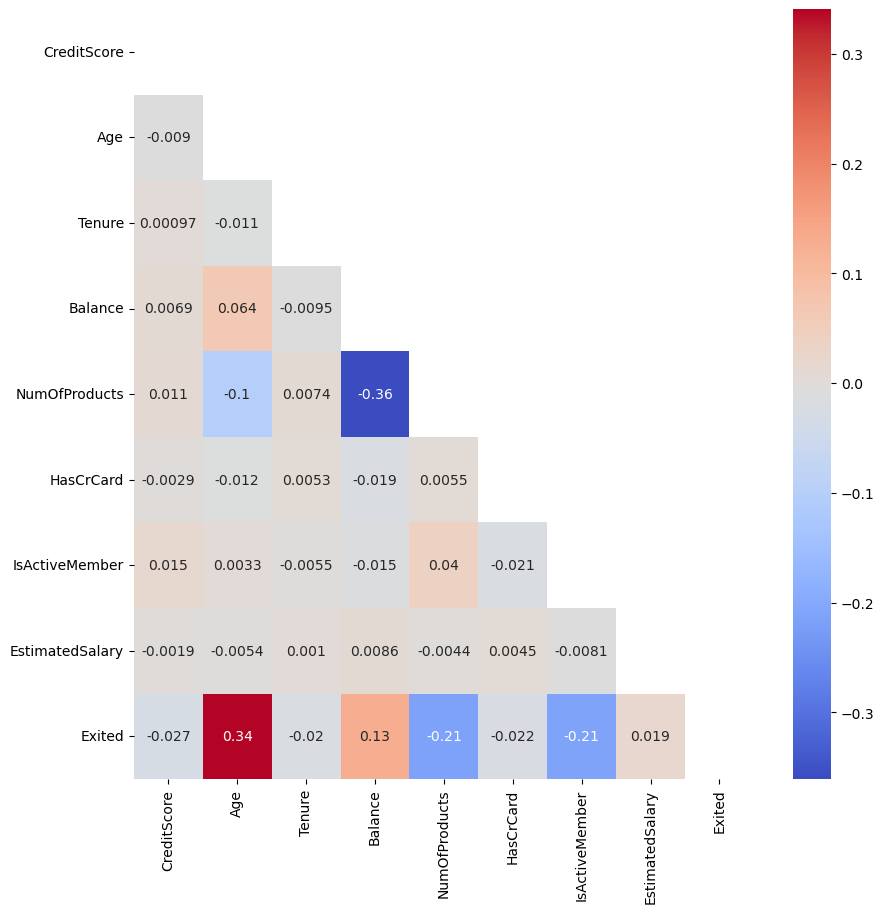

In [25]:
# define correlation matrix and mask
corr_matrix = train_df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,
           mask=mask,
           annot=True,
           cmap='coolwarm')

plt.show()

- users who have more balance in their accounts tend to have less products
- older users are more likely to churn
- less products the users own more likely they are going to churn
- less active users are more inclinded to churn
- there are no multicollinearity in the dataset

<Figure size 1500x1500 with 0 Axes>

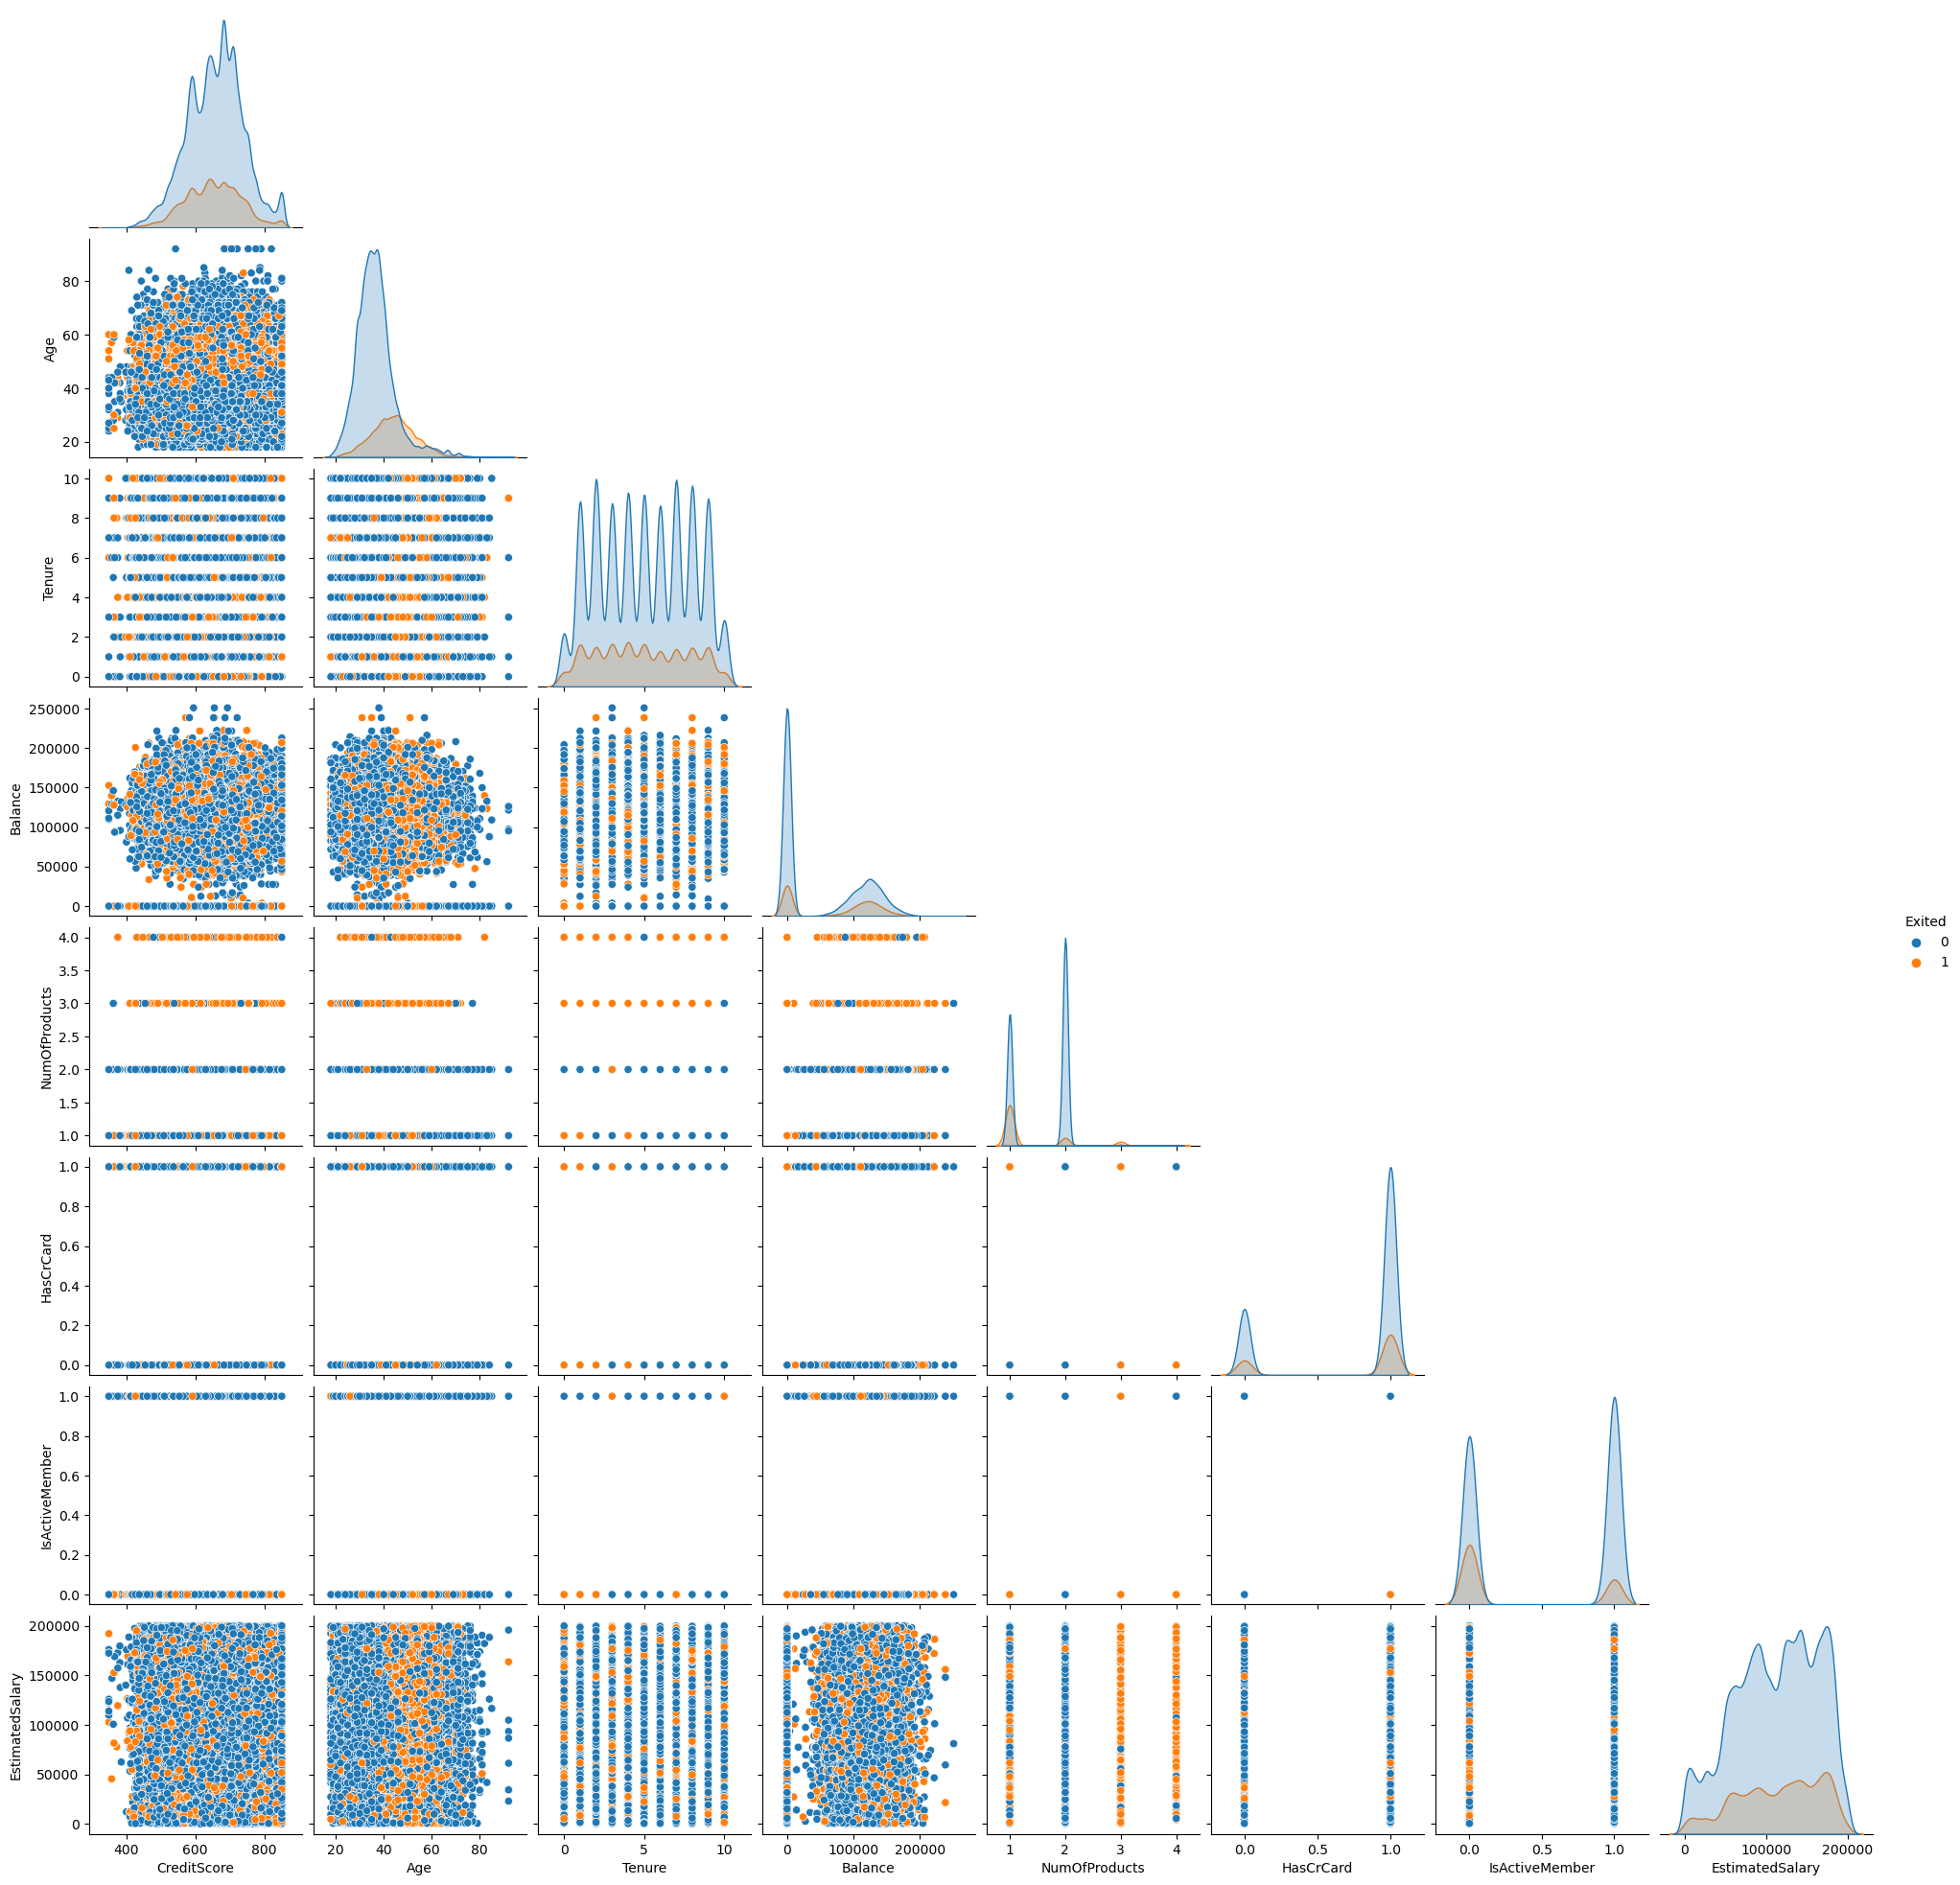

In [26]:
plt.figure(figsize=(15,15))

sns.pairplot(train_df,
            hue='Exited',
            corner=True)

plt.show()

### Geography vs. Churn Rate

Which country has the highest churn rate?

In [27]:
grouped_country = train_df.groupby(['Geography','Exited'])['Exited'].count()
grouped_country

Geography  Exited
France     0         78606
           1         15571
Germany    0         21488
           1         13113
Spain      0         29967
           1          6235
Name: Exited, dtype: int64

In [28]:
geography_df = round(grouped_country/train_df.groupby('Geography')['Geography'].count(),2).unstack().sort_values(by=1,ascending=False)
geography_df

Exited,0,1
Geography,,
Germany,0.62,0.38
France,0.83,0.17
Spain,0.83,0.17


<Figure size 800x500 with 0 Axes>

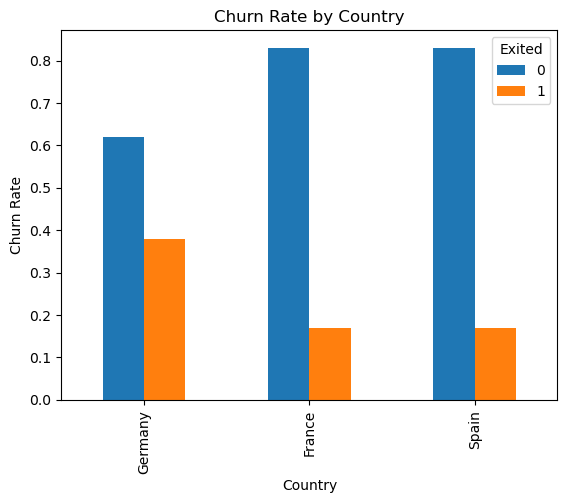

In [29]:
plt.figure(figsize=(8,5))
geography_df.plot(kind='bar')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.show()

Germany has the highest churn rate of 38%, compared to the other two countries.

### Geography vs. Balance

Which country has the highest balance on average? How does it vary between the two target groups?

In [30]:
geography_balance = round(train_df.groupby(['Geography','Exited'])['Balance'].mean(),2).unstack().sort_values(by=0+1,ascending=False)
geography_balance

Exited,0,1
Geography,,
Germany,121180.10,121330.14
Spain,38919.80,44039.03
France,36854.02,39882.48


<Figure size 800x500 with 0 Axes>

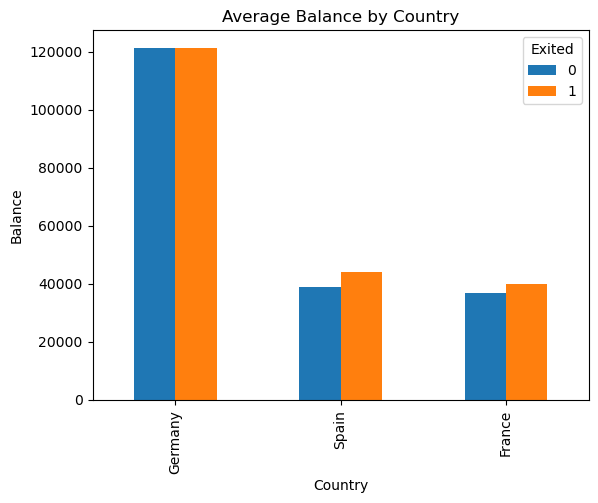

In [31]:
plt.figure(figsize=(8,5))
geography_balance.plot(kind='bar')
plt.title('Average Balance by Country')
plt.xlabel('Country')
plt.ylabel('Balance')
plt.show()

Germany stands out for having the highest average account balances, with a significant disparity between the balances of customers who have remained and those who have churned. Conversely, in Spain and France, the average balances are higher for those who have churned compared to those who have not, particularly in Spain where churned users' average balances are significantly higher.

### Geography vs. Credit Ownership

Which country has the highest percentage of users who own a credit card from the bank? How does it vary between two target groups?

In [32]:
geography_crcard = round(train_df.groupby(['Geography','Exited'])['HasCrCard'].sum()/train_df.groupby(['Geography'])['HasCrCard'].count(),2).unstack().sort_values(by=1,ascending=False)
geography_crcard

Exited,0,1
Geography,,
Germany,0.47,0.28
France,0.64,0.12
Spain,0.62,0.12


<Figure size 800x500 with 0 Axes>

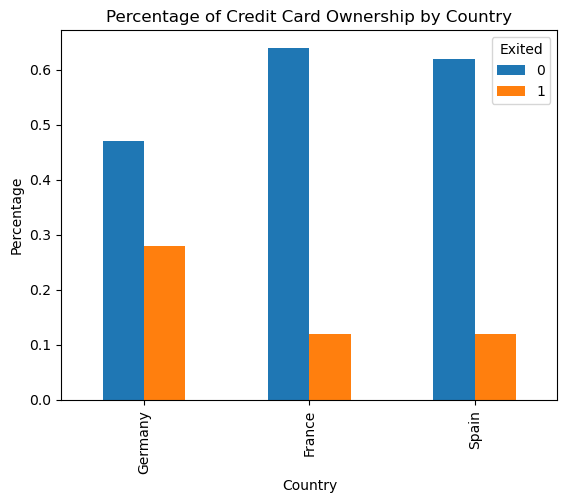

In [33]:
plt.figure(figsize=(8,5))
geography_crcard.plot(kind='bar')
plt.title('Percentage of Credit Card Ownership by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.show()

Churned users from Germany have notably greater percentage of credit card ownership compared to France and Spain.

### Geography vs. Active Member

Which country has the highest percentage of active members? How does it vary between two target groups?

In [34]:
geography_activemember= round(train_df.groupby(['Geography','Exited'])['IsActiveMember'].sum()/train_df.groupby(['Geography'])['IsActiveMember'].count(),2).unstack().sort_values(by=1,ascending=False)
geography_activemember

Exited,0,1
Geography,,
Germany,0.35,0.11
France,0.46,0.05
Spain,0.46,0.05


<Figure size 800x500 with 0 Axes>

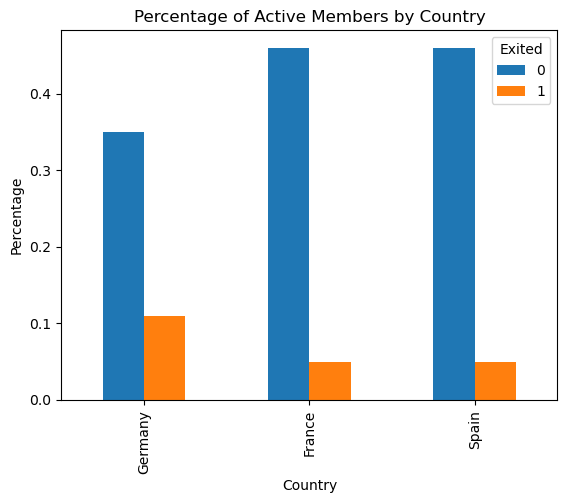

In [35]:
plt.figure(figsize=(8,5))
geography_activemember.plot(kind='bar')
plt.title('Percentage of Active Members by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.show()

The plot and numbers resemble the previous analysis. Germany has the highest percentage of active members who churned.

### Age vs. Churn Rate

Which age group has the highest churn rate?

In [36]:
print(min(train_df['Age']))
print(max(train_df['Age']))

18.0
92.0


In [37]:
# define bin edges
bins = [18,30,40,50,60,70,80,93]

# define group names
bin_names = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-93']

# divide the users into age brackets
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=bins, labels=bin_names, right=False)

In [38]:
churn_rate = train_df.groupby('AgeBin')['Exited'].mean().reset_index()
churn_rate

,AgeBin,Exited
0,18-29,0.083578
1,30-39,0.108319
2,40-49,0.348112
3,50-59,0.609474
4,60-69,0.387854
5,70-79,0.168200
6,80-93,0.118644


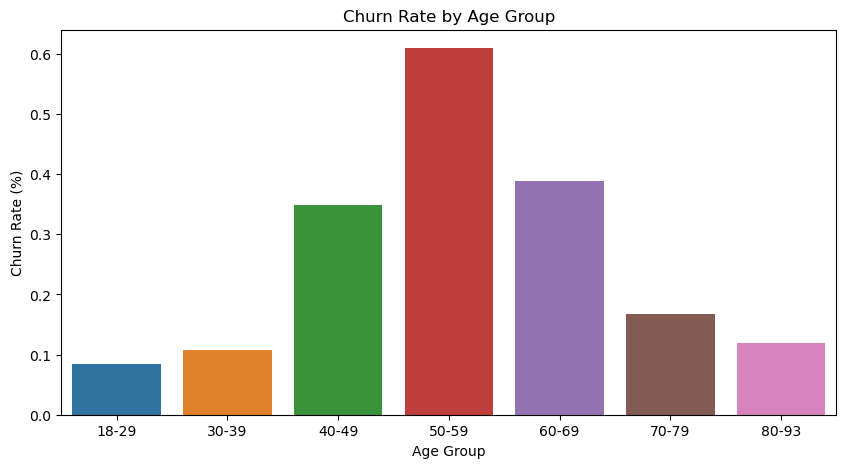

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x='AgeBin', y='Exited', data=churn_rate)
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.show()

Starting with 40-49 age group, there is a clear upward trend in churn rate as age increases, peaking in the 50-59 age group. Followd by a decline in the churn rate for subsequent age groups, with some variability. Young age group users with the age 18-29 has the lowest churn rate. The graph shows the middle aged users are more likely to churn.

### Age vs. Geography

How are users distributed in three countries based on their age?

In [40]:
train_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBin
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30-39
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30-39
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40-49
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30-39
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30-39


In [41]:
train_df.groupby(['AgeBin','Geography'])['AgeBin'].count()

AgeBin  Geography
18-29   France       14162
        Germany       4034
        Spain         5327
30-39   France       48399
        Germany      14621
        Spain        18212
40-49   France       23195
        Germany      11028
        Spain         9082
50-59   France        5784
        Germany       3904
        Spain         2493
60-69   France        2153
        Germany        860
        Spain          906
70-79   France         448
        Germany        148
        Spain          165
80-93   France          36
        Germany          6
        Spain           17
Name: AgeBin, dtype: int64

In [42]:
train_df.groupby('Geography')['Geography'].count()

Geography
France     94177
Germany    34601
Spain      36202
Name: Geography, dtype: int64

In [43]:
age_geography = round(train_df.groupby(['AgeBin','Geography'])['AgeBin'].count()/train_df.groupby('Geography')['Geography'].count(),3).unstack()
age_geography

Geography,France,Germany,Spain
AgeBin,,,
18-29,0.150,0.117,0.147
30-39,0.514,0.423,0.503
40-49,0.246,0.319,0.251
50-59,0.061,0.113,0.069
60-69,0.023,0.025,0.025
70-79,0.005,0.004,0.005
80-93,0.000,0.000,0.000


<Figure size 800x500 with 0 Axes>

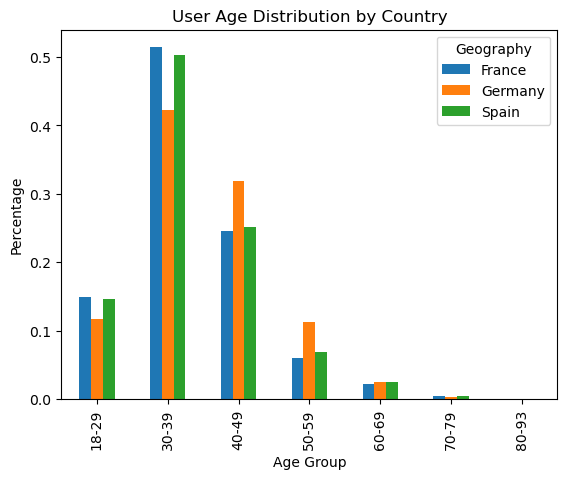

In [44]:
plt.figure(figsize=(8,5))
age_geography.plot(kind='bar')
plt.title('User Age Distribution by Country')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

For all three countries, 30-39 age group has the highest user base. France and Spain outnumber Germany in the younger age groups, while Germany surpases the other two countries in the user base ranging in age from 40-60.

### Age vs. Gender

How do users of different age groups vary between two genders?

In [45]:
age_geography = round(train_df.groupby(['AgeBin','Gender'])['AgeBin'].count()/train_df.groupby('Gender')['Gender'].count(),3).unstack()
age_geography

Gender,Female,Male
AgeBin,,
18-29,0.137,0.147
30-39,0.461,0.517
40-49,0.282,0.247
50-59,0.089,0.062
60-69,0.026,0.022
70-79,0.005,0.004
80-93,0.000,0.000


<Figure size 800x500 with 0 Axes>

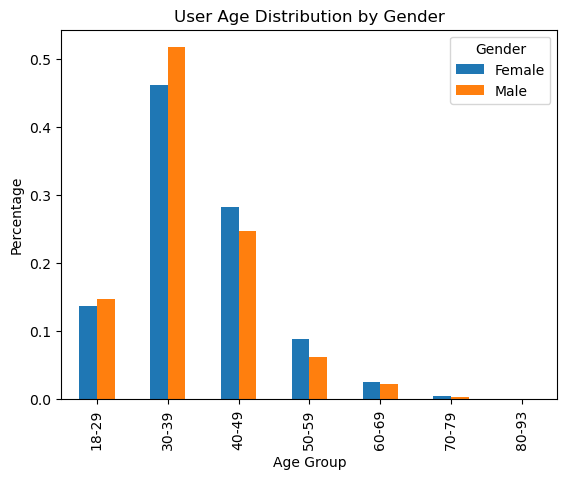

In [46]:
plt.figure(figsize=(8,5))
age_geography.plot(kind='bar')
plt.title('User Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

There are more male users in the age ranging from 18-39, female users started to surpass the male users for users older than 40.

### Age vs. Balance

Which age group has the highest balance on average? How does it vary between two target groups?

In [47]:
age_balance = round(train_df.groupby(['AgeBin','Exited'])['Balance'].mean(),2).unstack()
age_balance

Exited,0,1
AgeBin,,
18-29,50380.49,74995.41
30-39,49686.26,71920.37
40-49,54205.78,69996.92
50-59,61296.04,72328.60
60-69,52516.17,68778.42
70-79,50941.71,72092.48
80-93,41363.67,55015.67


<Figure size 800x500 with 0 Axes>

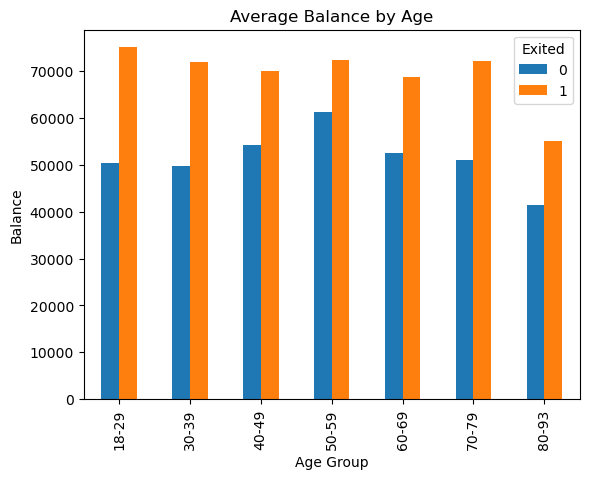

In [48]:
plt.figure(figsize=(8,5))
age_balance.plot(kind='bar')
plt.title('Average Balance by Age')
plt.xlabel('Age Group')
plt.ylabel('Balance')
plt.show()

For most age groups, the average balance does not differ drastically between those who churned and those who stayed, suggestig average balance alone may not be the sole or primary indicator of churn. Younger users (18-29) who churned on average have higher balance in their acount than those who churned from other age groups, while sers who did not churn with age ranging from 50-59 hold more balance on average. Age group 80-93 has the lest average balance for both target groups.

### Age vs. Credit Card Ownership

How does the percentage of users who own the credit card from the bank vary between age groups and target groups?

In [49]:
age_crcard = round(train_df.groupby(['AgeBin','Exited'])['HasCrCard'].sum()/train_df.groupby(['AgeBin','Exited'])['Exited'].count(),2).unstack()
age_crcard

Exited,0,1
AgeBin,,
18-29,0.76,0.70
30-39,0.77,0.72
40-49,0.75,0.75
50-59,0.72,0.74
60-69,0.75,0.74
70-79,0.75,0.68
80-93,0.77,0.43


<Figure size 800x500 with 0 Axes>

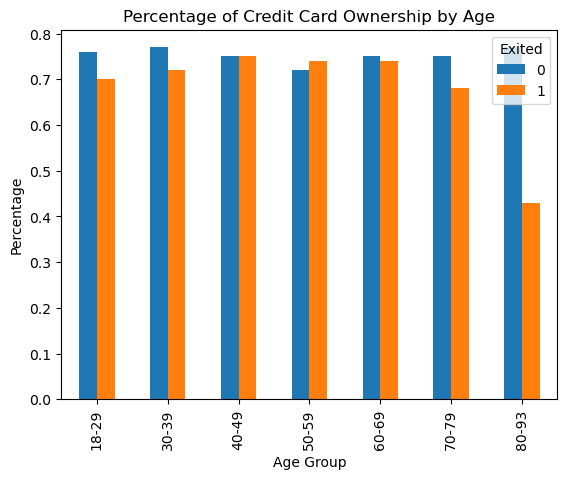

In [50]:
plt.figure(figsize=(8,5))
age_crcard.plot(kind='bar')
plt.title('Percentage of Credit Card Ownership by Age')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

Credit card ownership remains consistently high among all age brackets, with a majority of both active and churned customers showing ownership rates exceeding 60%. A modest downward trend is observable among churned clients within the senior segments (ages 80-93), where credit card possession is somewhat less common compared to their active counterparts. The pattern for churned individuals typically escalates from the 18 to 49 age range, then reverses, culminating in a significant decline, with rates approximately halving in the 80-93 category. On the contrary, the trend for those who remained with the service initially surges, peaking within the 30-39 range, followed by a reduction through the 40-59 categories, before ascending once more.

### Age vs. Active Members

How does the number of active members vary for different age groups?

In [51]:
age_activemember = round(train_df.groupby(['AgeBin','Exited'])['IsActiveMember'].sum()/train_df.groupby(['AgeBin','Exited'])['Exited'].count(),2).unstack()
age_activemember

Exited,0,1
AgeBin,,
18-29,0.53,0.32
30-39,0.54,0.30
40-49,0.54,0.26
50-59,0.76,0.31
60-69,0.89,0.41
70-79,0.89,0.53
80-93,0.83,0.57


<Figure size 800x500 with 0 Axes>

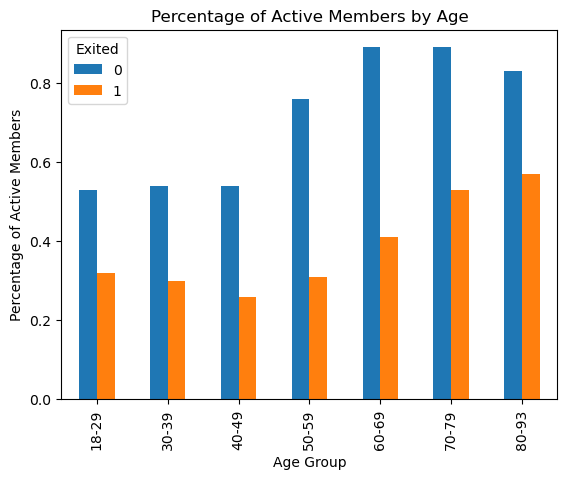

In [52]:
plt.figure(figsize=(8,5))
age_activemember.plot(kind='bar')
plt.title('Percentage of Active Members by Age')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Active Members')
plt.show()

For the youngest age groups (18-49), there's a higher proportion of active members who have stayed with the service as opposed to those who have churned. The 50-59 and 60-69 age groups also show a greater percentage of active members who have remained, maintaining the trend seen with the younger members. Interestingly, there is an increase in the proportion of active members who have churned in the 70-79 and 80-93 age brackets. There is a notable trend where the proportion of churned members increases with age, particularly starting from the 60-69 age group onward, suggesting that churn rates may be higher among senior members.

# Export Cleaned Datasets

In [53]:
# export
train_df.to_csv('train_df_cleaned.csv',index=False)
test_df.to_csv('test_df_cleaned.csv',index=False)